In [1]:
import sys
sys.path.append('../')
import re
import os
import time
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import json
from utils.rouge import RougeL
from utils.precision_recall_f1 import precision_recall_f1
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
matplotlib.style.use('ggplot')

## 保持全局长度下计算 label 的 ceil rougel

In [13]:
ori_ceil_rougels = []
zero_ceil_rougel_samples = set()

with open('../input/answer_mrc_dataset/train.json') as f:
    lines = f.readlines()
    for line in tqdm(lines):
        if not line.startswith('{'):
            continue

        sample = json.loads(line.strip())
        ori_ceil_rougels.append(sample['ceil_rougel'])
        
        if sample['ceil_rougel'] == 0:
            zero_ceil_rougel_samples.add(sample['question_id'])
        
        if sample['ceil_rougel'] < 0.6:
            print(sample['question_id'])

 13%|█▎        | 3223/24343 [00:00<00:03, 5401.82it/s]

Q_09884jndjy


 63%|██████▎   | 15403/24343 [00:02<00:01, 5317.38it/s]

Q_41856hsjkk


 75%|███████▍  | 18161/24343 [00:03<00:01, 5433.42it/s]

Q_06428qyysc


 89%|████████▊ | 21594/24343 [00:03<00:00, 5444.86it/s]

Q_21476ckdgg
Q_15475sshdd


100%|██████████| 24343/24343 [00:04<00:00, 5450.70it/s]


/home/lq/softwares/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


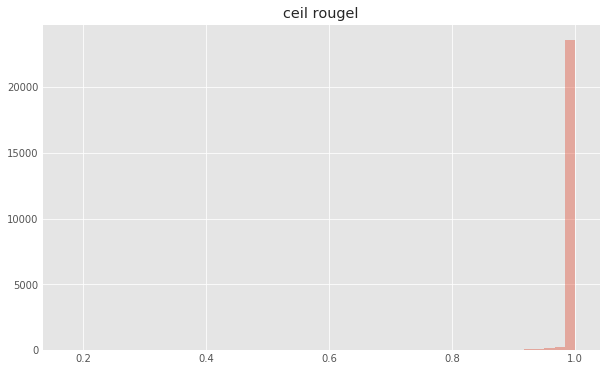

In [14]:
plt.figure(figsize=(10, 6))
sns.distplot(ori_ceil_rougels, kde=False)
plt.title('ceil rougel')
plt.show()

In [15]:
ori_ceil_rougels = np.array(ori_ceil_rougels)

In [16]:
ori_ceil_rougels = ori_ceil_rougels[ori_ceil_rougels > -1]

In [17]:
print('total:', ori_ceil_rougels.shape[0])
print('ceil rougel < 0.20:', ori_ceil_rougels[ori_ceil_rougels < 0.2].shape[0])
print('ceil rougel > 0.95:', ori_ceil_rougels[ori_ceil_rougels > 0.95].shape[0])
print('ceil rougel = 0:', ori_ceil_rougels[ori_ceil_rougels == 0].shape[0])
print('ceil rougel = 1:', ori_ceil_rougels[ori_ceil_rougels == 1].shape[0])

total: 24343
ceil rougel < 0.20: 1
ceil rougel > 0.95: 24028
ceil rougel = 0: 0
ceil rougel = 1: 23460


In [18]:
print(ori_ceil_rougels[ori_ceil_rougels == 1].shape[0] / ori_ceil_rougels.shape[0])
print(np.mean(ori_ceil_rougels))

0.9637267386928481
0.9980960060144034


## 训练集的 content 截断后的 ceil rougel

In [19]:
ori_ceil_rougels = []

zero_ceil_rougel_samples = set()

with open('../input/answer_mrc_dataset/train_max_content_len_1024.json') as f:
    lines = f.readlines()
    for line in tqdm(lines):
        if not line.startswith('{'):
            continue

        sample = json.loads(line.strip())
        ori_ceil_rougels.append(sample['ceil_rougel'])
        
        if sample['ceil_rougel'] == 0:
            zero_ceil_rougel_samples.add(sample['question_id'])

100%|██████████| 24342/24342 [00:02<00:00, 9187.26it/s]


/home/lq/softwares/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


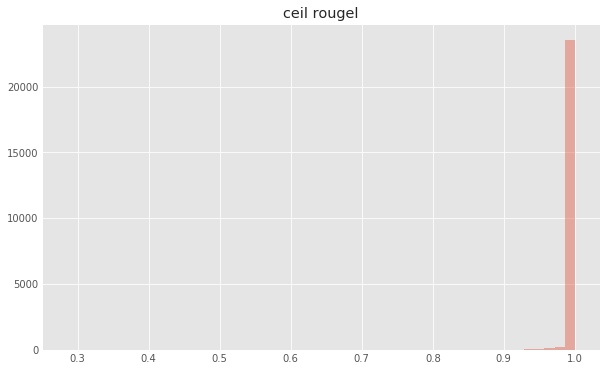

In [20]:
plt.figure(figsize=(10, 6))
sns.distplot(ori_ceil_rougels, kde=False)
plt.title('ceil rougel')
plt.show()

In [21]:
ori_ceil_rougels = np.array(ori_ceil_rougels)

In [22]:
print('total:', ori_ceil_rougels.shape[0])
print('ceil rougel < 0.20:', ori_ceil_rougels[ori_ceil_rougels < 0.2].shape[0])
print('ceil rougel > 0.95:', ori_ceil_rougels[ori_ceil_rougels > 0.95].shape[0])
print('ceil rougel = 0:', ori_ceil_rougels[ori_ceil_rougels == 0].shape[0])
print('ceil rougel = 1:', ori_ceil_rougels[ori_ceil_rougels == 1].shape[0])

total: 24342
ceil rougel < 0.20: 0
ceil rougel > 0.95: 24028
ceil rougel = 0: 0
ceil rougel = 1: 23460


In [23]:
print(ori_ceil_rougels[ori_ceil_rougels == 1].shape[0] / ori_ceil_rougels.shape[0])
print(np.mean(ori_ceil_rougels))

0.963766329800345
0.9981298286627366
